<a href="https://colab.research.google.com/github/MatsumotoTeruo/Iris_data/blob/main/Iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Wine dataset
Iris = load_iris()
X, y = Iris.data, Iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

import pandas as pd
from sklearn.datasets import load_iris


df = pd.DataFrame(data=Iris.data, columns=Iris.feature_names)
df['target'] = Iris.target

# check for missing value
df.isnull().sum()

#drop missing value if any
df.dropna(inplace=True)
# impute missing value with the mean, median, or mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # or 'median' or 'most_frequent'
df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']] = imputer.fit_transform(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a dictionary to store the results
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC'],
    'Accuracy': [],  # Add accuracy values for each model
    'Precision': [],  # Add average precision values for each model
    'Recall': [],  # Add average recall values for each model
    'F1-Score': []  # Add average F1-score values for each model
}

# Create a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_log_reg = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, y_pred_log_reg)
print(f"Classification Report:\n{report}")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
print(f"Confusion Matrix:\n{cm}")
# Get accuracy
accuracy_lr = accuracy_score(y_test,  y_pred_log_reg)
results['Accuracy'].append(accuracy_lr)

# Get precision, recall, and F1-score from classification_report
report_lr = classification_report(y_test,  y_pred_log_reg, output_dict=True)
results['Precision'].append(report_lr['macro avg']['precision'])
results['Recall'].append(report_lr['macro avg']['recall'])
results['F1-Score'].append(report_lr['macro avg']['f1-score'])

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Wine dataset
Iris = load_iris()
X, y = Iris.data, Iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_model.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Get accuracy
accuracy_lr = accuracy_score(y_test,  y_pred_log_reg)
results['Accuracy'].append(accuracy_lr)

# Get precision, recall, and F1-score from classification_report
report_lr = classification_report(y_test,  y_pred_log_reg, output_dict=True)
results['Precision'].append(report_lr['macro avg']['precision'])
results['Recall'].append(report_lr['macro avg']['recall'])
results['F1-Score'].append(report_lr['macro avg']['f1-score'])

Decision Tree Accuracy: 1.0000


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


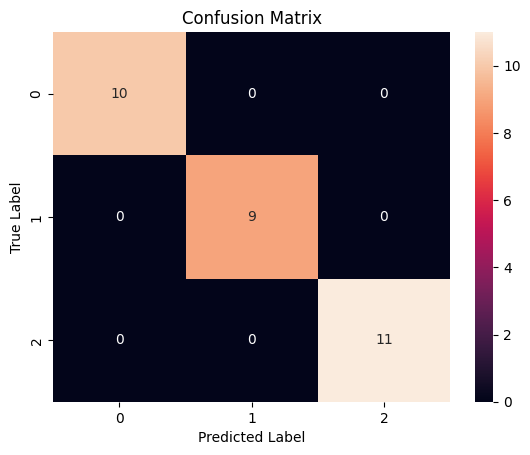

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # To see the output, run the code.

# Get accuracy
accuracy_lr = accuracy_score(y_test,  y_pred_log_reg)
results['Accuracy'].append(accuracy_lr)

# Get precision, recall, and F1-score from classification_report
report_lr = classification_report(y_test,  y_pred_log_reg, output_dict=True)
results['Precision'].append(report_lr['macro avg']['precision'])
results['Recall'].append(report_lr['macro avg']['recall'])
results['F1-Score'].append(report_lr['macro avg']['f1-score'])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    # ... other hyperparameters
}

# Create GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Model:", best_model)
print("Best Score:", best_score)

Best Model: RandomForestClassifier(n_estimators=200, random_state=42)
Best Score: 0.95


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


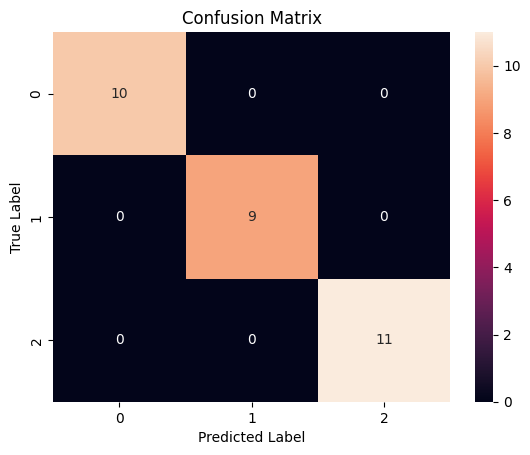

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Fit the model to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # To see the output, run the code.

# Get accuracy
accuracy_lr = accuracy_score(y_test,  y_pred_log_reg)
results['Accuracy'].append(accuracy_lr)

# Get precision, recall, and F1-score from classification_report
report_lr = classification_report(y_test,  y_pred_log_reg, output_dict=True)
results['Precision'].append(report_lr['macro avg']['precision'])
results['Recall'].append(report_lr['macro avg']['recall'])
results['F1-Score'].append(report_lr['macro avg']['f1-score'])

In [ ]:
from sklearn.model_selection import cross_val_score

# Try different values of k
k_values = list(range(1, 31))  # Try k from 1 to 30
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the k with the highest cross-validation score
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print("Optimal k:", optimal_k)

# Create a new KNN classifier with the optimal k
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train, y_train)

Optimal k: 3


KNeighborsClassifier(n_neighbors=3)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


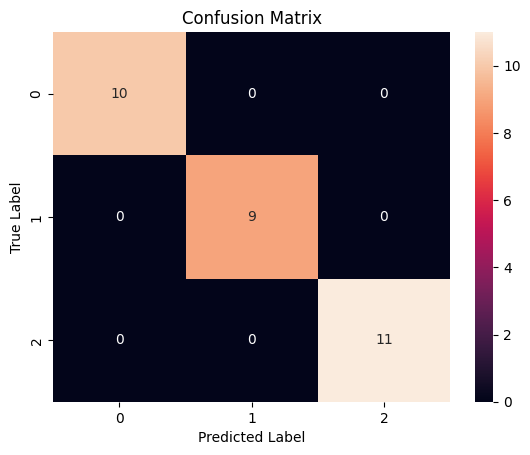

Best Model: SVC(C=0.1, gamma=0.1, kernel='poly', random_state=42)
Best Score: 0.9583333333333334


In [ ]:
from sklearn.svm import SVC
# Create an SVC object
svc_classifier = SVC(kernel='rbf', random_state=42)  # You can adjust kernel and other hyperparameters

# Fit the model to the training data
svc_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show() # To see the output, run the code.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Create GridSearchCV object
grid_search = GridSearchCV(svc_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Model:", best_model)
print("Best Score:", best_score)

# Get accuracy
accuracy_lr = accuracy_score(y_test,  y_pred_log_reg)
results['Accuracy'].append(accuracy_lr)

# Get precision, recall, and F1-score from classification_report
report_lr = classification_report(y_test,  y_pred_log_reg, output_dict=True)
results['Precision'].append(report_lr['macro avg']['precision'])
results['Recall'].append(report_lr['macro avg']['recall'])
results['F1-Score'].append(report_lr['macro avg']['f1-score'])

In [ ]:
import pandas as pd

# Ensure all lists in 'results' have the same length
max_len = max(len(v) for v in results.values())
for k in results:
    if len(results[k]) < max_len:
        results[k].extend([None] * (max_len - len(results[k])))  # Pad with None

results_df = pd.DataFrame(results)
print(results_df)

                  Model  Accuracy  Precision  Recall  F1-Score
0   Logistic Regression       1.0        1.0     1.0       1.0
1         Decision Tree       1.0        1.0     1.0       1.0
2         Random Forest       1.0        1.0     1.0       1.0
3                   KNN       1.0        1.0     1.0       1.0
4                   SVC       1.0        1.0     1.0       1.0
5                  None       1.0        1.0     1.0       1.0
6                  None       1.0        1.0     1.0       1.0
7                  None       1.0        1.0     1.0       1.0
8                  None       1.0        1.0     1.0       1.0
9                  None       1.0        NaN     NaN       NaN
10                 None       1.0        NaN     NaN       NaN
11                 None       1.0        NaN     NaN       NaN
